In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize'] = 50, 100
rcParams.update({'font.size': 50})



######################################################
#This is the core fucntion to compute the clearness
def get_clearness(im):
    gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    clearnes = cv2.Laplacian(gray_im, cv2.CV_64F).var()
    return clearnes
######################################################





def blur_image(im, degree):
    kernel = np.ones((degree, degree), np.float32) / (degree**2)
    blured_im = cv2.filter2D(im,-1,kernel)
    return blured_im 


def demo():
   
    im = cv2.imread("potray_.jpg")
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    
    im_blur_5 =  blur_image(im, 5)
    
    im_blur_10 =  blur_image(im, 10)
    
    
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(im)
    plt.title('Clearness: {:.2f}'.format(get_clearness(im)))
    plt.subplot(1, 3, 2)
    plt.imshow(im_blur_5)
    plt.title('Clearness: {:.2f}'.format(get_clearness(im_blur_5)))
    plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(im_blur_10)
    plt.title('Clearness: {:.2f}'.format(get_clearness(im_blur_10)))
    plt.axis("off")
    plt.show()
    
    
    
    tic = time.clock()
    for i in range(100):
        get_clearness(im)
    toc = time.clock()
    print("On average, one 560*599 image takes {:2f} secondsto compute the clearness on Intel i5-6400".format((toc - tic)/100))
    
    


    

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


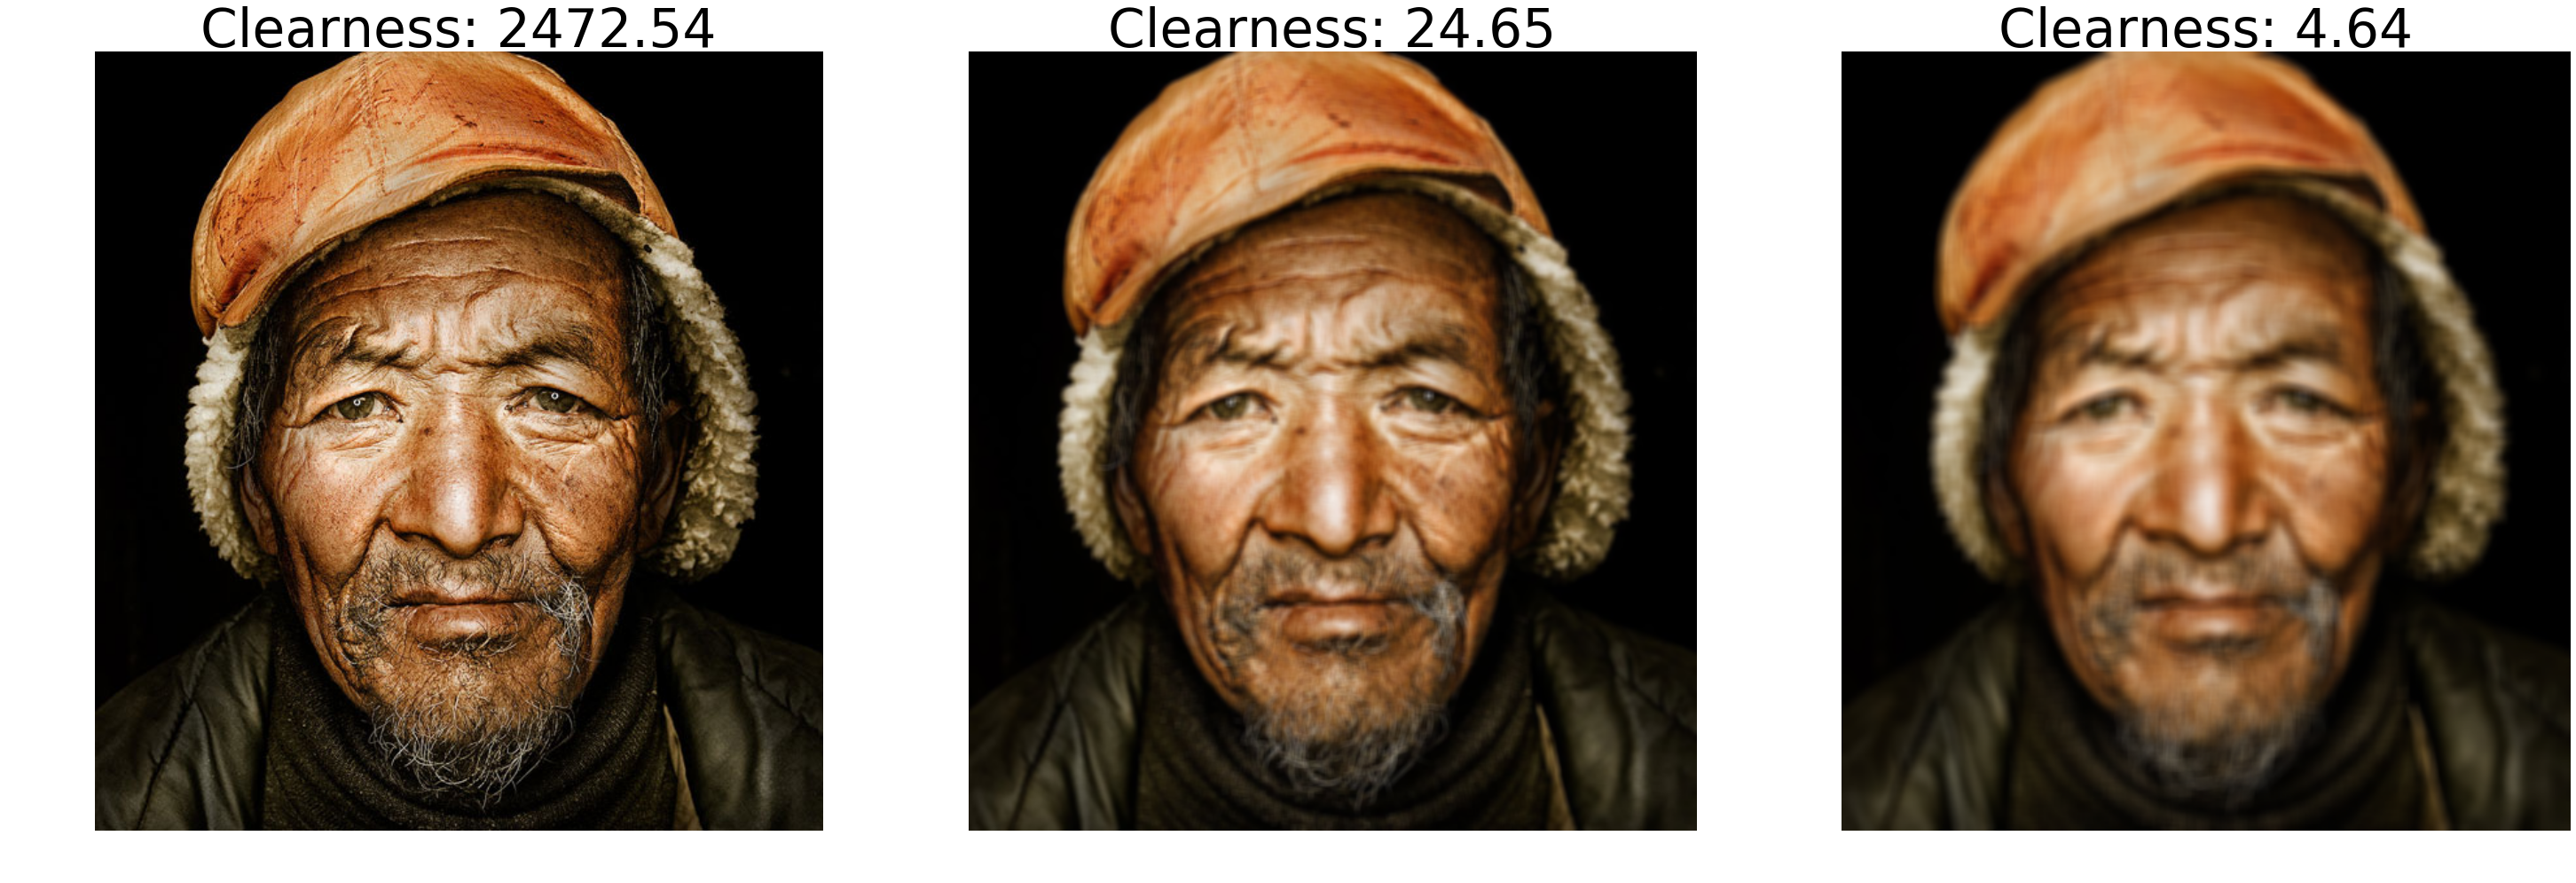

On average, one 560*599 image takes 0.007592 secondsto compute the clearness on Intel i5-6400


In [3]:
#Higher value implies better image quality
#This portrait was shoot by National Geogrpahic Photographer: Cory Richards 
demo()